In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
!ls "/content/drive/My Drive/Baghi_data_set"


'crop_growth (1).csv'   crop_growth.csv


In [5]:
# import the libraries
import pandas as pd

In [32]:
# import the data set
data = pd.read_csv("/content/drive/My Drive/Baghi_data_set/crop_growth (1).csv")
data.head()

,ID,Crop type,PH Value,Potassium (ppm),Phosphorus (ppm),Soil Type,Sunlight Hours,Temperature (°C),Humidity (%),Growth Status (Output)
0,82,Tomato,6.619158,313.502568,92.986545,Well-drained,10.923523,25.445704,74.140371,1
1,207,Capsicum,6.058814,331.392744,27.092285,Well-drained,10.035825,28.353554,76.599557,0
2,289,Capsicum,6.154097,119.974631,72.941826,Loamy Soil,8.269282,25.594354,83.039549,0
3,125,Cabbage,6.353503,321.636247,101.903690,Well-drained,7.346022,21.260301,76.365724,1
4,257,Capsicum,4.989351,292.567148,63.790303,Loamy Soil,11.550902,27.170621,71.218917,0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      424 non-null    int64  
 1   Crop type               424 non-null    object 
 2   PH Value                424 non-null    float64
 3   Potassium (ppm)         424 non-null    float64
 4   Phosphorus (ppm)        424 non-null    float64
 5   Soil Type               424 non-null    object 
 6   Sunlight Hours          424 non-null    float64
 7   Temperature (°C)        424 non-null    float64
 8   Humidity (%)            424 non-null    float64
 9   Growth Status (Output)  424 non-null    int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 33.2+ KB


In [25]:
data.describe()

,ID,PH Value,Potassium (ppm),Phosphorus (ppm),Sunlight Hours,Temperature (°C),Humidity (%),Growth Status (Output)
count,424.00000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000
mean,212.50000,6.372091,260.039809,67.528532,9.478959,26.164240,72.629230,0.500000
std,122.54251,0.459197,79.494245,26.003065,1.643255,4.127488,8.440335,0.500591
min,1.00000,4.571000,54.161445,4.500361,6.077488,15.590813,50.252268,0.000000
25%,106.75000,6.133515,191.620514,53.339715,8.417704,23.072584,66.875095,0.000000
50%,212.50000,6.424687,267.381644,66.027037,9.217662,26.014143,72.299402,0.500000
75%,318.25000,6.684274,322.831419,78.834081,10.396852,28.732640,78.911548,1.000000
max,424.00000,7.356873,399.084419,149.839691,16.695184,38.890191,94.868636,1.000000


In [26]:
data['Growth Status (Output)'].value_counts()

,count
Growth Status (Output),
1,212
0,212


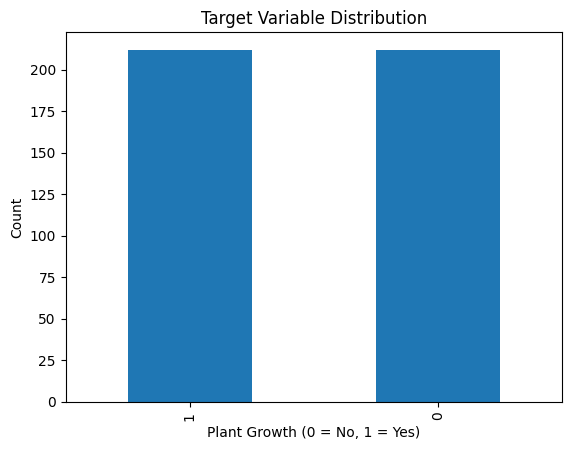

In [27]:
# Check the distribution of the target variable
import matplotlib.pyplot as plt

data['Growth Status (Output)'].value_counts().plot(kind='bar')
plt.title("Target Variable Distribution")
plt.xlabel("Plant Growth (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

In [34]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['Crop type', 'Soil Type']
# Replace 'sparse' with 'sparse_output'
encoder = OneHotEncoder(sparse_output=False)
encoded_categorical = encoder.fit_transform(data[categorical_columns])

encoded_categorical_df = pd.DataFrame(
    encoded_categorical,
    columns=encoder.get_feature_names_out(categorical_columns)
)


data_encoded = pd.concat(
    [encoded_categorical_df, data.drop(columns=categorical_columns)],
    axis=1
)

data_encoded.head()

,Crop type_Bean,Crop type_Brinjal,Crop type_Cabbage,Crop type_Capsicum,Crop type_Tomato,Soil Type_Clay,Soil Type_Clay Loam,Soil Type_Clay Soil,Soil Type_Loamy Soil,Soil Type_Sand Clay Loam,Soil Type_Sandy Loam,Soil Type_Well-drained,ID,PH Value,Potassium (ppm),Phosphorus (ppm),Sunlight Hours,Temperature (°C),Humidity (%),Growth Status (Output)
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,82,6.619158,313.502568,92.986545,10.923523,25.445704,74.140371,1
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,207,6.058814,331.392744,27.092285,10.035825,28.353554,76.599557,0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,289,6.154097,119.974631,72.941826,8.269282,25.594354,83.039549,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,125,6.353503,321.636247,101.903690,7.346022,21.260301,76.365724,1
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,257,4.989351,292.567148,63.790303,11.550902,27.170621,71.218917,0


In [35]:
# feature scaling
from sklearn.preprocessing import StandardScaler

numerical_columns = ['PH Value', 'Potassium (ppm)', 'Phosphorus (ppm)', 'Sunlight Hours', 'Temperature (°C)', 'Humidity (%)']

scaler = StandardScaler()
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

data_encoded.head()

,Crop type_Bean,Crop type_Brinjal,Crop type_Cabbage,Crop type_Capsicum,Crop type_Tomato,Soil Type_Clay,Soil Type_Clay Loam,Soil Type_Clay Soil,Soil Type_Loamy Soil,Soil Type_Sand Clay Loam,Soil Type_Sandy Loam,Soil Type_Well-drained,ID,PH Value,Potassium (ppm),Phosphorus (ppm),Sunlight Hours,Temperature (°C),Humidity (%),Growth Status (Output)
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,82,0.538678,0.673331,0.980195,0.880126,-0.174291,0.179250,1
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,207,-0.683035,0.898647,-1.556894,0.339280,0.531049,0.470955,0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,289,-0.475289,-1.764035,0.208425,-0.737017,-0.138234,1.234858,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,125,-0.040527,0.775769,1.323527,-1.299529,-1.189521,0.443218,1
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,257,-3.014774,0.409662,-0.143931,1.262367,0.244112,-0.167290,0


In [38]:
data_encoded = data_encoded.drop(['ID'],axis=True)

In [39]:
data_encoded.head()

,Crop type_Bean,Crop type_Brinjal,Crop type_Cabbage,Crop type_Capsicum,Crop type_Tomato,Soil Type_Clay,Soil Type_Clay Loam,Soil Type_Clay Soil,Soil Type_Loamy Soil,Soil Type_Sand Clay Loam,Soil Type_Sandy Loam,Soil Type_Well-drained,PH Value,Potassium (ppm),Phosphorus (ppm),Sunlight Hours,Temperature (°C),Humidity (%),Growth Status (Output)
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.538678,0.673331,0.980195,0.880126,-0.174291,0.179250,1
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.683035,0.898647,-1.556894,0.339280,0.531049,0.470955,0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.475289,-1.764035,0.208425,-0.737017,-0.138234,1.234858,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.040527,0.775769,1.323527,-1.299529,-1.189521,0.443218,1
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-3.014774,0.409662,-0.143931,1.262367,0.244112,-0.167290,0


In [41]:
from sklearn.model_selection import train_test_split


X = data_encoded.drop(['Growth Status (Output)'], axis=1)
y = data_encoded['Growth Status (Output)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (339, 18)
Testing set size: (85, 18)


In [42]:
# Create the model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

In [68]:
logistic_model = LogisticRegression(random_state=42)

logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

y_probs = logistic_model.predict_proba(X_test)[:, 1]


In [69]:
accuracy = accuracy_score(y_test, y_pred)


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


roc_auc = roc_auc_score(y_test, y_probs)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.87
Precision: 0.88
Recall: 0.86
F1-Score: 0.87
ROC-AUC: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        43
           1       0.88      0.86      0.87        42

    accuracy                           0.87        85
   macro avg       0.87      0.87      0.87        85
weighted avg       0.87      0.87      0.87        85



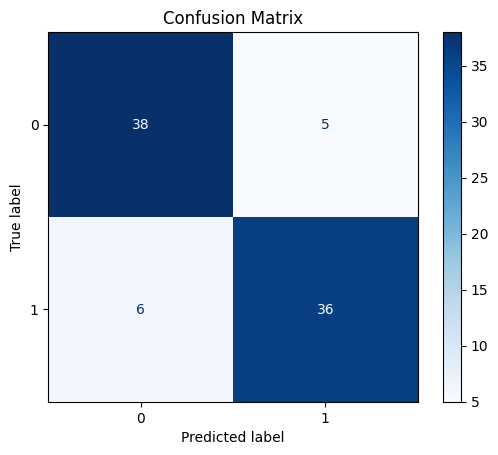

In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [71]:
def predict_growth_status(model, sample_data, encoder, scaler, categorical_columns, numerical_columns):

    encoded_sample = encoder.transform(sample_data[categorical_columns])
    encoded_sample_df = pd.DataFrame(encoded_sample, columns=encoder.get_feature_names_out(categorical_columns))


    numerical_sample = sample_data.drop(columns=categorical_columns)
    numerical_sample_scaled = scaler.transform(numerical_sample)
    numerical_sample_df = pd.DataFrame(numerical_sample_scaled, columns=numerical_columns)


    final_sample = pd.concat([encoded_sample_df, numerical_sample_df], axis=1)


    predicted_class = model.predict(final_sample)


    predicted_probabilities = model.predict_proba(final_sample)

    return predicted_class[0], predicted_probabilities[0]


In [72]:
sample_input = pd.DataFrame({
    'Crop type': ['Bean'],
    'PH Value': [6.4],
    'Potassium (ppm)': [194],
    'Phosphorus (ppm)': [42],
    'Soil Type': ['Clay'],
    'Sunlight Hours': [8.1],
    'Temperature (°C)': [25],
    'Humidity (%)': [77]
})


In [73]:
predicted_class, predicted_probabilities = predict_growth_status(
    model=logistic_model,
    sample_data=sample_input,
    encoder=encoder,
    scaler=scaler,
    categorical_columns=categorical_columns,
    numerical_columns=numerical_columns
)

print(f"Predicted Class (Growth Status): {'Growth' if predicted_class == 1 else 'No Growth'}")
print(f"Probability of Growth: {predicted_probabilities[1]:.2f}")
print(f"Probability of No Growth: {predicted_probabilities[0]:.2f}")


Predicted Class (Growth Status): No Growth
Probability of Growth: 0.08
Probability of No Growth: 0.92


In [74]:
import joblib

joblib.dump(logistic_model, 'logistic_model.pkl')

joblib.dump(encoder, 'encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Model, encoder, and scaler saved!")


Model, encoder, and scaler saved!
